In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# CSGO round winner prediction

# What is CSGO?

> CSGO(Counter Strike Global-Offencive) is a round based tactical shooter between CT(Counter terrorist) and T(Terrorist) where we buy equipments usig in game cash that is provided by the game in each round. The overall goal is that the terrorist must plant a bomb while the counter terrorist must stop them or defuse the bomb.

In [2]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier 

In [3]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [4]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


# Data preprocessing


In [5]:
df.isnull().sum() # finding nulls

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

C:\Users\sahil\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='round_winner', ylabel='count'>

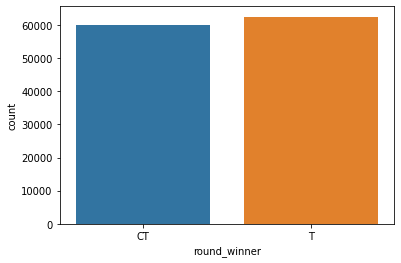

In [6]:
sns.countplot(df['round_winner'])

In [7]:
col = df.columns

In [8]:
# checking for columns for only one value
t=[]
for i in col:
    t.append(df[i].nunique())


In [9]:
# all the columns with only one value
temp =[]
for i in range(len(t)):
    if t[i]==1:
        temp.append(i)
        print(i)

22
30
37
52
58
60


C:\Users\sahil\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ct_weapon_bizon', ylabel='count'>

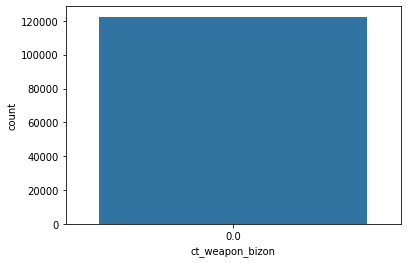

In [10]:
sns.countplot(df[col[22]])

In [11]:
df.drop([col[22], col[30], col[37], col[52], col[58], col[60]], axis = 1, inplace = True) # dropping those columns
print(col[22])
print(col[30])
print(col[37])
print(col[52])
print(col[58])
print(col[60])

ct_weapon_bizon
ct_weapon_g3sg1
t_weapon_m249
ct_weapon_negev
ct_weapon_r8revolver
ct_weapon_sawedoff


In [12]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


### label encoding all categorical values


In [13]:
label_encoder = preprocessing.LabelEncoder() 
df['map'] = label_encoder.fit_transform(df['map'])

In [14]:
df['bomb_planted'] = label_encoder.fit_transform(df['bomb_planted'])

In [15]:
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

In [16]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
col = df.columns

In [18]:
c = []
for i in col:
    c.append(df['round_winner'].corr(df[i]))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 91 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int32  
 4   bomb_planted                  122410 non-null  int64  
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

## Normalizing the data using Standard Scalar

In [20]:
standscl = preprocessing.StandardScaler()

In [21]:
standscl.fit(df)

StandardScaler()

In [22]:
standscl.transform(df)

array([[ 1.41582771, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       [ 1.06753073, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       [-0.03409385, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       ...,
       [ 0.31291789,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622],
       [-0.0542903 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622],
       [-0.4214985 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622]])

In [23]:
df = standscl.transform(df)

In [24]:
df = pd.DataFrame(df, columns = col)

In [25]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,1.415828,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
1,1.067531,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
2,-0.034094,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
3,-0.401302,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
4,1.415277,-1.191823,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819


In [26]:
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

## Splitting the data into X and Y

In [27]:
x = df.drop('round_winner', axis = 1)

In [28]:
x.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.415828,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
1,1.067531,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
2,-0.034094,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
3,-0.401302,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
4,1.415277,-1.191823,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855


In [29]:
y = df['round_winner']

In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: round_winner, dtype: int64

## Train Test Split


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Training and Evaluation

In [32]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)
pred_1 = model_1.predict(x_test)
cr1    = classification_report(y_test,pred_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



In [33]:
model_2 = DecisionTreeClassifier()
model_2.fit(x_train,y_train)
pred_2 = model_2.predict(x_test)
cr2 = classification_report(y_test,pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     12004
           1       0.82      0.82      0.82     12478

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482



In [34]:
model_3 = RandomForestClassifier()
model_3.fit(x_train,y_train)
pred_3 = model_3.predict(x_test)
cr3 = classification_report(y_test,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12004
           1       0.89      0.87      0.88     12478

    accuracy                           0.88     24482
   macro avg       0.88      0.88      0.88     24482
weighted avg       0.88      0.88      0.88     24482



In [35]:
model_4 = XGBClassifier()
model_4.fit(x_train,y_train)
pred_4 = model_4.predict(x_test)
cr4 = classification_report(y_test,pred_4)
print(cr4)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     12004
           1       0.82      0.78      0.80     12478

    accuracy                           0.80     24482
   macro avg       0.80      0.80      0.80     24482
weighted avg       0.80      0.80      0.80     24482



In [ ]:
model_5 = MLPClassifier()
model_5.fit(x_train,y_train)
pred_5 = model_5.predict(x_test)
cr5 = classification_report(y_test,pred_5)
print(cr5)

In [ ]:
print('Optimal accuracy for random forest classifier:', str(accuracy_score(y_test,pred_3)*100) + '%')